# Title: Automotive Vehicles 
# Analysis by: Christian Little
# Date: 06/16/2024





# Introduction 

This dataset provides detailed information on various car listings, covering factors such as make, model, body type, transmission, and selling prices. While it represents a sample and not the entire car industry, it offers valuable insights into trends that are important for both buyers and sellers in the automotive market. By analyzing this data, we can uncover patterns in vehicle pricing, popular body types, and transmission preferences, offering helpful guidance for making informed purchasing and selling decisions.

# ASK:

###  Identify the task 

### 1. Questions for the analysis  

+ Are there any specific brands or body types that are consistently more affordable or expensive?
+ Do certain body types tend to be more popular for specific makes?
+ Can we identify any trends that might be relevant for car buyers, such as best-value body types or brands?
+ What are the most common car makes and models in the dataset, and how do their prices compare?
+ Are there noticeable price differences between automatic and manual transmissions?


### Key task:

The key objective of this analysis is to provide readers with the knowledge and confidence to make informed decisions, whether they are buying or selling a car. My aim is to offer fresh insights into the car market, helping individuals feel assured in their choices. Cars have many different characteristics, and by breaking these down into categories, this analysis will empower readers to select the options that best align with their preferences, based on a deeper understanding of the available data.








# Prepare:

This dataset, sourced from https://www.kaggle.com/, provides comprehensive car data ranging from 1985 to 2015. Available as a single CSV file with 558,837 rows, it offers detailed information on various car types, prices, and body styles.

This dataset for vehicles can be found here.
https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/code. To facilitate more in-depth analysis, the data has been carefully cleaned and organized using Microsoft Excel. This preparation allows for a thorough exploration of car trends, patterns, and frequencies, with the aim of helping first-time buyers and sellers make informed decisions.

# Importing/ Installs

In [ ]:
# Shapely is used for manipulation and analysis of planar geometric objects.
# It provides functionalities to create, manipulate, and analyze the geometry of shapes.
!pip install shapely

# Fiona is a library for reading and writing vector data in GIS formats such as shapefiles.
# It provides an interface to handle geographic data and integrates well with GeoPandas.
!pip install fiona

# Pyproj is a Python interface to the PROJ library, which performs cartographic transformations.
# It is used to convert geographic coordinates between different projections and coordinate systems.
!pip install pyproj

# Rtree is a spatial index library used for efficient querying of spatial data.
# It enhances the performance of spatial operations by indexing geometric objects.
!pip install rtree

# GeoPandas extends the capabilities of pandas to handle geographic data.
# It allows for spatial operations on geometric types and integrates with other GIS libraries.
!pip install geopandas

# Plotly is a graphing library that makes interactive, publication-quality graphs online.
# It is used to create interactive visualizations, including maps, with easy-to-use syntax.
!pip install plotly

# Upgrade NumPy, Dask, and xarray
# NumPy: Fundamental package for array computing with Python, essential for numerical operations.
# Dask: Provides parallel computing with advanced scheduling, useful for large data processing.
# xarray: N-D labeled arrays and datasets in Python, useful for working with multi-dimensional data.
!pip install --upgrade numpy dask xarray
!pip install pymupdf
!pip install ipython




In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tabulate import tabulate
import gc
gc.collect()
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import seaborn as sns
from matplotlib.ticker import FuncFormatter





In [36]:
# Load the first CSV file
df = pd.read_csv(r"C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\car_prices.csv")

## Lets view the data

In [37]:
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [38]:

df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [40]:
# Display the data types of each column in the DataFrame 'df'
df.dtypes


year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [64]:
# Converting the 'saledate' column to datetime format
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# Display the first few rows to verify the change
print(df['saledate'].head())


C:\Users\bliss\AppData\Local\Temp\ipykernel_10444\1403136721.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')


0    2014-12-16 12:30:00+08:00
1    2014-12-16 12:30:00+08:00
2    2015-01-15 04:30:00+08:00
3    2015-01-29 04:30:00+08:00
4    2014-12-18 12:30:00+08:00
Name: saledate, dtype: object


C:\Users\bliss\AppData\Local\Temp\ipykernel_10444\1403136721.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')


# Now its time to clean and restructure the data 

In [65]:
# Check unique values in 'transmission' to understand what needs to be cleaned
print(df['transmission'].unique())

# Remove rows where 'transmission' is 'sedan'
df = df[df['transmission'] != 'sedan']

# Alternatively, if there might be capitalization or spacing issues:
df['transmission'] = df['transmission'].str.strip().str.lower()  # This normalizes the data
df = df[df['transmission'] != 'sedan']


['automatic' 'manual']


In [41]:
# Remove duplicate rows,keeping the first occurrence
df = df.drop_duplicates()

In [42]:
# Convert 'year' column to datetime format becasue column contains Months,years,and days. 
df['year'] = pd.to_datetime(df['year'], format='%Y')


In [51]:
# Format the sellingprice as USD
df['sellingprice'] = df['sellingprice'].apply(lambda x: f"${x:,.2f}")


In [66]:
# Remove rows where transmission is 'unknown' or 'sedan'
df = df[(df['transmission'] != 'nan') & (df['transmission'] != 'sedan')]

# Check to ensure these values are removed
print("Unique transmissions after filtering:", df['transmission'].unique())


Unique transmissions after filtering: ['automatic' 'manual']


In [68]:
# Drop rows with any missing values from the DataFrame and create a new DataFrame 'cleaned_df'
cleaned_df = df.dropna()

# Check and display the number of missing values in each column of the cleaned DataFrame
cleaned_df.isna().sum()

df.to_csv(r"C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\cleaned_car_prices_no_unknown_sedan.csv", index=False)


In [70]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing values before cleaning:")
print(missing_values)

# Remove rows with missing values in any column
df_cleaned = df.dropna()

# Check again to ensure all missing values are removed
missing_values_after_cleaning = df_cleaned.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after_cleaning)


Missing values before cleaning:
year                0
make             8540
model            8632
trim             8856
body            11032
transmission        0
vin                 0
state               0
condition        9909
odometer           63
color             595
interior          595
seller              0
mmr                11
sellingprice       11
saledate           11
dtype: int64

Missing values after cleaning:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


# Lets seek for patterns in this dataset 

## Counting and calculating  

#### Total number of cars 

In [21]:
total_cars = df['make'].count()

# Display the total number of cars
display("Total number of cars: {}".format(total_cars))

'Total number of cars: 484919'

### Total count of cars by make (TOP 5)

In [56]:
# Step 1: Count the total number of cars per make
top_5_makes_by_count = df['make'].value_counts().nlargest(5).reset_index()

# Step 2: Rename the columns for clarity
top_5_makes_by_count.columns = ['make', 'total_cars']

# Step 3: Display the top 5 makes with the highest total count of cars
print(top_5_makes_by_count)


        make  total_cars
0       Ford       82460
1  Chevrolet       55336
2     Nissan       44755
3     Toyota       36072
4      Dodge       27687


### Average selling price by body type (Top 5 brands ) 

In [71]:


# Step 1: Filter the dataset to include only the specific body types of interest: Coupe, Sedan, SUV, Hatchback, Convertible
filtered_bodies = ['Coupe', 'Sedan', 'SUV', 'Hatchback', 'Convertible']
filtered_data = df[df['body'].isin(filtered_bodies)]

# Step 2: Get the top 5 makes by total car count
top_5_makes = filtered_data['make'].value_counts().nlargest(5).index

# Step 3: Filter the dataset to include only the top 5 makes
filtered_top_5_data = filtered_data[filtered_data['make'].isin(top_5_makes)]

# Step 4: Group by 'make' and 'body' to calculate the average selling price for each make's body type
average_price_by_make_and_body = filtered_top_5_data.groupby(['make', 'body'])['sellingprice'].mean().reset_index()

# Step 5: Format the selling price to USD format with a dollar sign
average_price_by_make_and_body['sellingprice'] = average_price_by_make_and_body['sellingprice'].apply(lambda x: '${:,.2f}'.format(x))

# Step 6: Create a readable table with borders using tabulate
table = tabulate(average_price_by_make_and_body, headers='keys', tablefmt='grid')

# Step 7: Display the result
print("Top 5 makes with average selling price by body type:")
print(table)


Top 5 makes with average selling price by body type:
+----+-----------+-------------+----------------+
|    | make      | body        | sellingprice   |
+====+===========+=============+================+
|  0 | Chevrolet | Convertible | $24,156.32     |
+----+-----------+-------------+----------------+
|  1 | Chevrolet | Coupe       | $13,908.18     |
+----+-----------+-------------+----------------+
|  2 | Chevrolet | Hatchback   | $8,549.16      |
+----+-----------+-------------+----------------+
|  3 | Chevrolet | SUV         | $13,998.43     |
+----+-----------+-------------+----------------+
|  4 | Chevrolet | Sedan       | $8,877.35      |
+----+-----------+-------------+----------------+
|  5 | Ford      | Convertible | $13,552.20     |
+----+-----------+-------------+----------------+
|  6 | Ford      | Coupe       | $14,255.89     |
+----+-----------+-------------+----------------+
|  7 | Ford      | Hatchback   | $10,488.42     |
+----+-----------+-------------+---------------

### Total number of cars for each year

In [22]:
# Group by 'year' and count the number of entries for each year
car_counts_by_year = df.groupby('year').size().reset_index(name='count')

# Display the DataFrame
display(car_counts_by_year)


,year,count
0,1982-01-01,2
1,1983-01-01,1
2,1984-01-01,5
3,1985-01-01,10
4,1986-01-01,9
5,1987-01-01,8
6,1988-01-01,11
7,1989-01-01,19
8,1990-01-01,41
9,1991-01-01,60


### Total number of cars by decade 

In [23]:
# Define bins for the decades with datetime
bins = [pd.Timestamp('1982-01-01'), pd.Timestamp('1993-01-01'), pd.Timestamp('2004-01-01'), pd.Timestamp('2015-01-01')]
labels = ['1982-1992', '1993-2003', '2004-2015',]

# Create a new column 'Decade' using datetime bins
df['Decade'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)


# Group by 'Decade' and count the entries
car_counts_by_decade = df.groupby('Decade').size().reset_index(name='Count')

# Display the results
display(car_counts_by_decade)



C:\Users\bliss\AppData\Local\Temp\ipykernel_10444\1936352768.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car_counts_by_decade = df.groupby('Decade').size().reset_index(name='Count')


,Decade,Count
0,1982-1992,280
1,1993-2003,38272
2,2004-2015,446658


### Total  number of Automatic and Manual cars 

In [24]:
# Count the occurrences of each transmission type
transmission_counts = df['transmission'].value_counts().reset_index(name='Count')
transmission_counts.columns = ['Transmission', 'Count']  # Renaming columns for clarity

# Display the cleaned and counted transmission data
print(transmission_counts)


  Transmission   Count
0    automatic  475915
1       manual   17544


### Total number of cars by color 

In [25]:
# Count the occurrences of each color
color_counts = df['color'].value_counts()

# Display the color counts
display(color_counts)


color
black        96843
white        93260
silver       74574
gray         72983
blue         45273
red          38985
—            22338
gold         10344
green        10100
burgundy      8012
beige         7980
brown         5800
orange        1878
purple        1345
off-white     1290
yellow        1156
charcoal       442
turquoise      208
pink            40
lime            13
Name: count, dtype: int64

### Average selling price by Transmission 

In [63]:
# Step 1: Calculate the average selling price for each type of transmission
average_prices = df.groupby('transmission')['sellingprice'].mean()

# Step 2: Format the average selling prices to USD format with a dollar sign
average_prices_usd = average_prices.apply(lambda x: '${:,.2f}'.format(x))

# Step 3: Display the average selling prices in USD format
print("Average selling price by transmission type:")
print(average_prices_usd)


Average selling price by transmission type:
transmission
automatic    $13,540.41
manual       $11,211.45
Name: sellingprice, dtype: object


# visualization

### Top Car Makes in the US

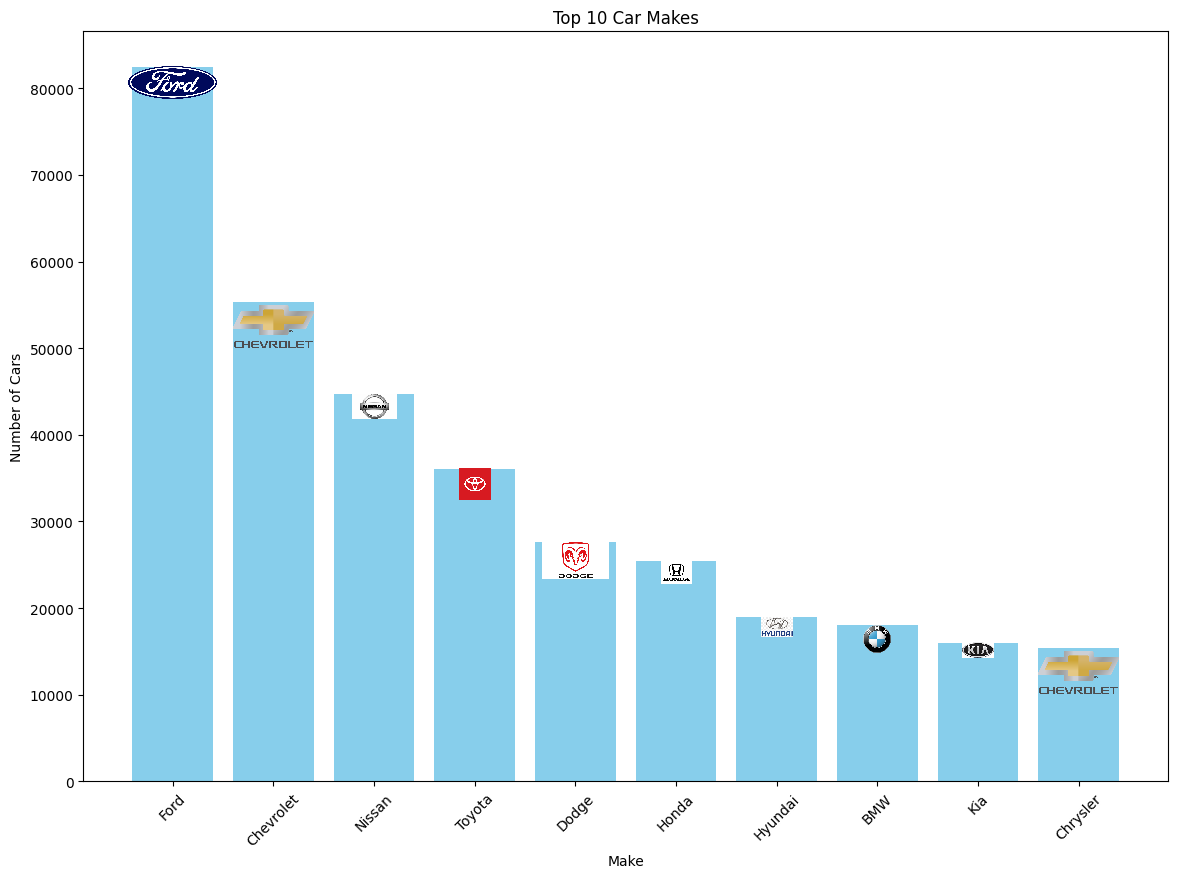

In [32]:
# Assuming df is already loaded with the car make data
make_counts = df['make'].value_counts()
top_10_makes = make_counts.head(10)

image_paths = {
    'Toyota': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\unnamed.jpg',
    'Ford': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\Ford_logo_flat.svg.png',
    'Honda': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\honda5836.logowik.com.webp',
    'Chevrolet': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\Chevrolet-logo.png',
    'Hyundai': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\kisspng-hyundai-motor-company-portable-network-graphics-ve-5b778a1ca87e30.7479622015345607966902.jpg',
    'Nissan': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\maxresdefault.jpg',
    'Kia': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\71JJPEJLWSL._AC_UF894,1000_QL80_.jpg',
    'BMW': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\BMW.svg.png',
    'Dodge': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\Emblem-Dodge.jpg',  
    'Chrysler': r'C:\Users\bliss\OneDrive\Documents\Jupyter Notebooks\CarSales\Chevrolet-logo.png'  
}


fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size for more space
bars = ax.bar(top_10_makes.index, top_10_makes.values, color='skyblue')

def get_image(path, zoom):
    im = Image.open(path)
    return OffsetImage(im, zoom=zoom)

for bar, make in zip(bars, top_10_makes.index):
    if make in image_paths:
        zoom_level = 0.025  # Reduced zoom level to fit the layout
        ab = AnnotationBbox(get_image(image_paths[make], zoom_level),
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                            frameon=False,
                            box_alignment=(0.5, 1))  # Adjusted alignment
        ax.add_artist(ab)

plt.title('Top 10 Car Makes')
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.1, top=0.85)  # Manually adjust margins
plt.show()


NOTES: A key observation about this chart is that Ford, being an American-made brand, is expected to have a strong presence in this dataset.

# Average selling price

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\bliss\AppData\Local\Temp\ipykernel_10444\1678360685.py:10: SyntaxWarning: invalid escape sequence '\$'
  average_price_by_make_and_body['sellingprice'] = average_price_by_make_and_body['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(float)


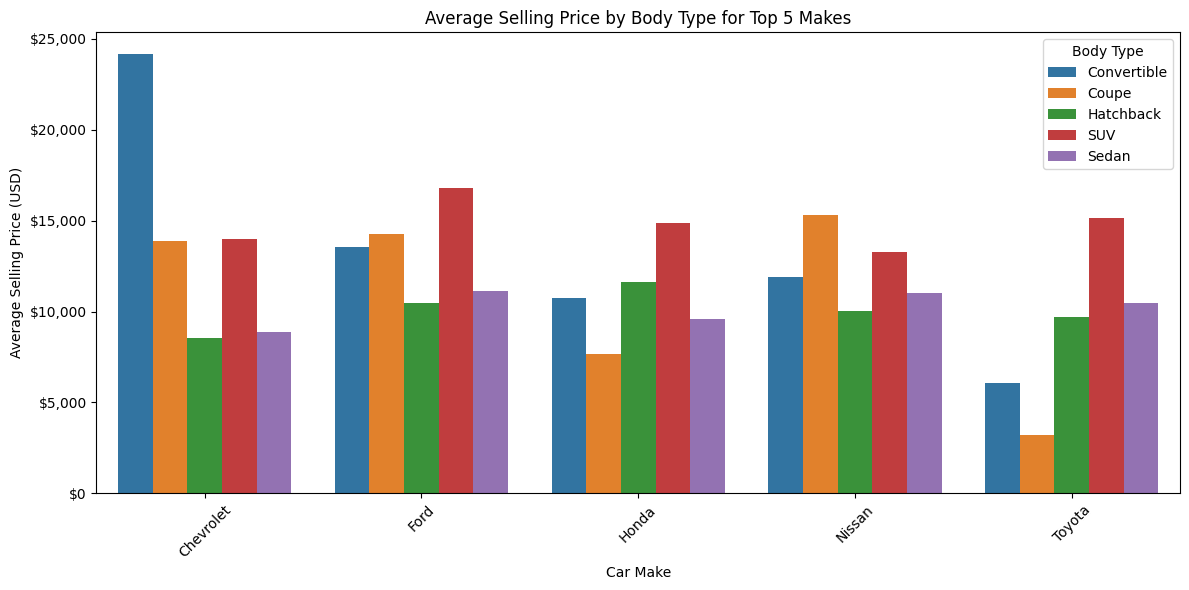

In [81]:
# Function to format y-axis as USD currency
def usd_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Convert 'sellingprice' back to numeric for plotting
average_price_by_make_and_body['sellingprice'] = average_price_by_make_and_body['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_make_and_body, x='make', y='sellingprice', hue='body')

# Add titles and labels
plt.title('Average Selling Price by Body Type for Top 5 Makes')
plt.xlabel('Car Make')
plt.ylabel('Average Selling Price (USD)')
plt.legend(title='Body Type')
plt.xticks(rotation=45)

# Format y-axis as USD currency
formatter = FuncFormatter(usd_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Show the plot
plt.show()


NOTES: Toyota and Honda, as Japan's leading brands, typically have lower average selling prices across various body types, highlighting their emphasis on affordability and the economy segment.

# Car count by Decades

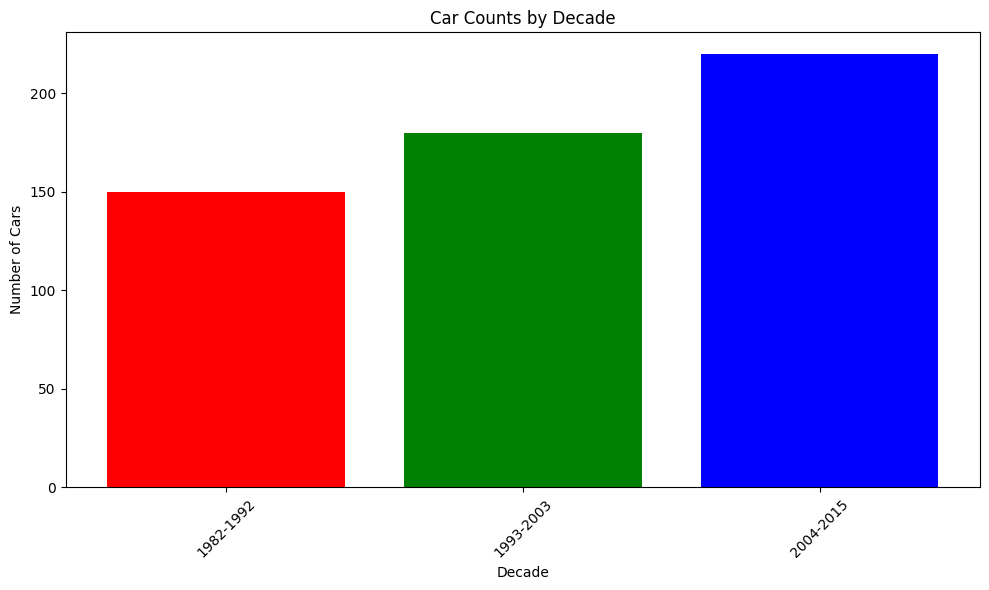

In [28]:
# Assuming car_counts_by_decade is predefined and has the necessary 'Decade' and 'Count' columns
# Example data for demonstration purposes
data = {
    'Decade': ['1982-1992', '1993-2003', '2004-2015'],
    'Count': [150, 180, 220]
}
car_counts_by_decade = pd.DataFrame(data)

# List of colors for each bar
colors = ['red', 'green', 'blue']  # Define more colors if there are more decades

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(car_counts_by_decade['Decade'], car_counts_by_decade['Count'], color=colors)
plt.title('Car Counts by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NOTES: The graph reveals a clear upward trend, with the number of cars steadily increasing each decade, reflecting the growing popularity and availability of vehicles over time.

# Car count by each Year 

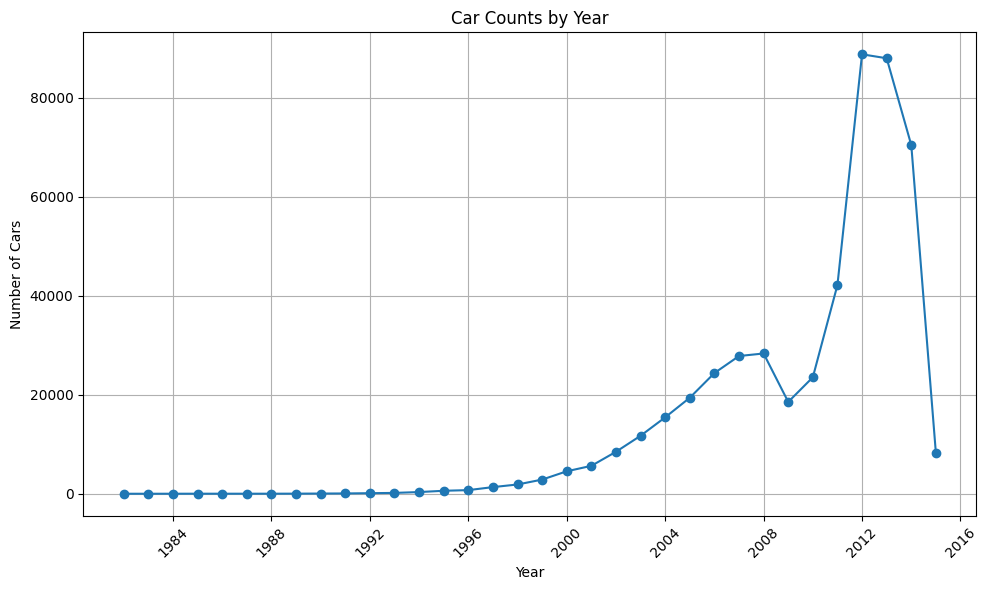

In [30]:
# Ensure the 'year' data type is correct for plotting; convert if necessary
car_counts_by_year['year'] = pd.to_datetime(car_counts_by_year['year'], format='%Y')  # Adjust format as necessary

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(car_counts_by_year['year'], car_counts_by_year['count'], marker='o', linestyle='-')  # Line plot with markers
plt.title('Car Counts by Year')  # Add a title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Number of Cars')  # Label the y-axis
plt.grid(True)  # Add a grid for easier reading
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()  # Display the plot


NOTES: There is a significant spike in car counts between 2009 and 2012. Overall, the graph demonstrates an upward trend in vehicle counts over the years, suggesting an increase in vehicle production or ownership.

# Transmission: Automatic VS. Manual 

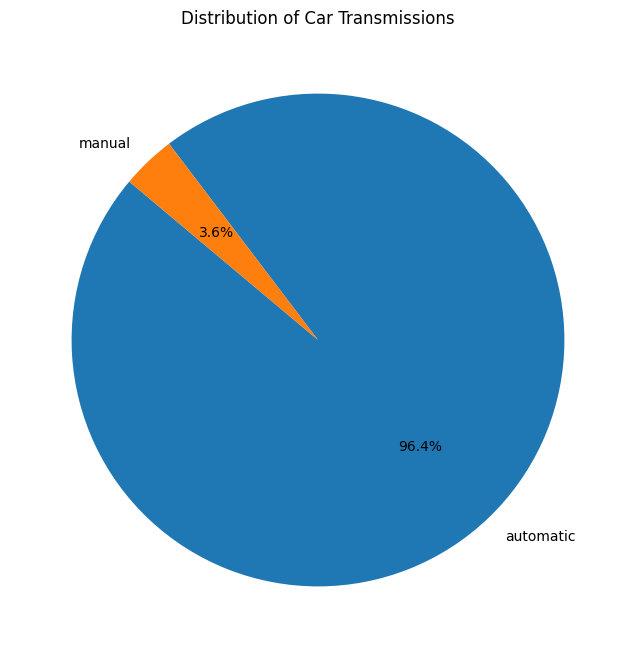

In [29]:
# transmission_counts['Transmission'] might have values like 'automatic', 'manual'
# transmission_counts['Count'] holds the counts of each type

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(transmission_counts['Count'], labels=transmission_counts['Transmission'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Transmissions')
plt.show()


NOTES: Automatic transmissions likely dominate the distribution, reflecting the growing preference for automatic vehicles in the market.
       
       

# Vehicle Colors (Preference) 

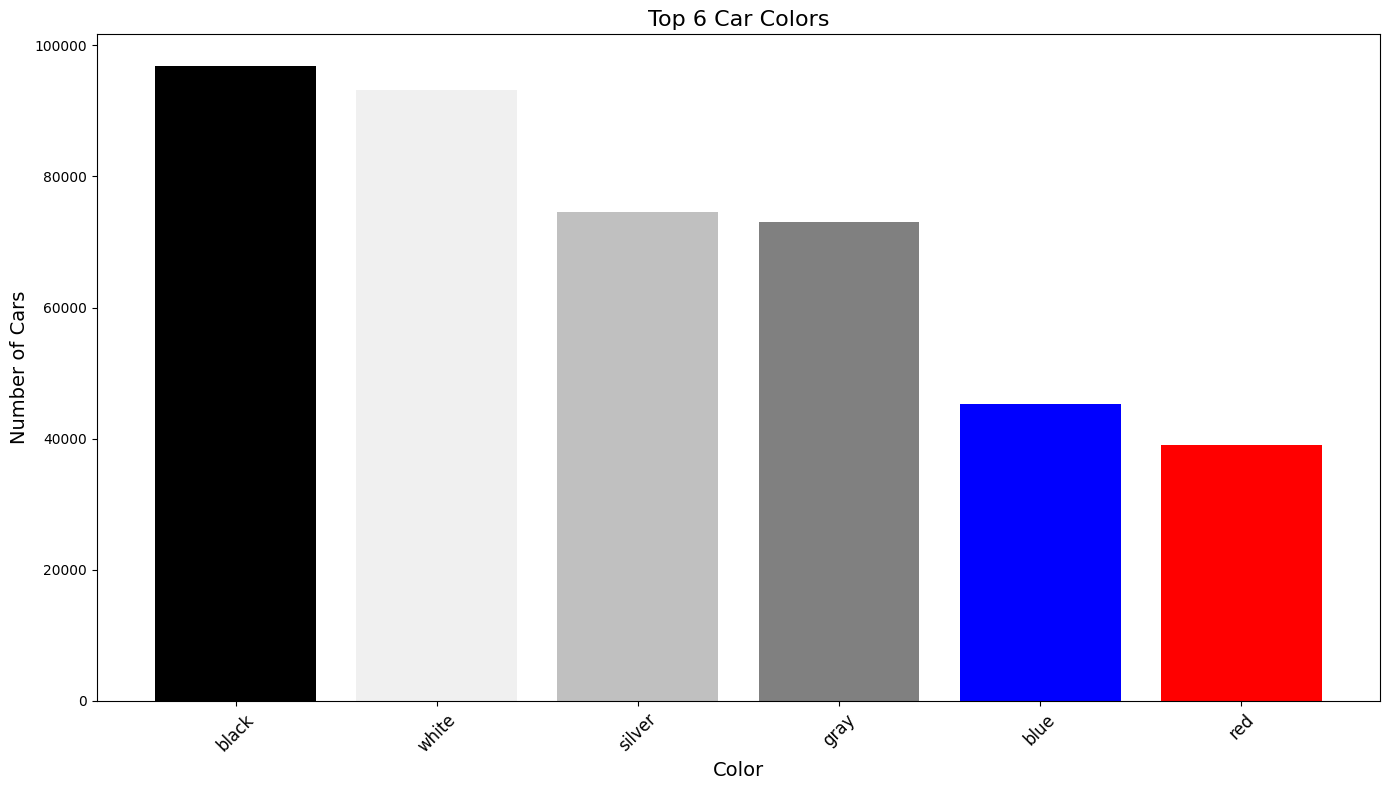

In [31]:
top_colors = df['color'].value_counts().head(6)
# Define a dictionary mapping color names to actual color codes
color_mapping = {
    'black': 'black',
    'white': '#F0F0F0',  # Changed from 'white' to a light gray color
    'silver': 'silver',
    'red': 'red',
    'blue': 'blue',
    'gray': 'gray',
    'green': 'green',
    'brown': 'brown',
    'beige': 'beige',
    'yellow': 'yellow',
    # Add more mappings if necessary
}

# Assuming 'top_colors' is your DataFrame or Series with indexed color names
# Create a list of colors for the bars by mapping from the top_colors index
bar_colors = [color_mapping[color] if color in color_mapping else 'grey' for color in top_colors.index]


import matplotlib.pyplot as plt

# Assuming you already have the 'top_colors' data prepared
# For demonstration, let's say it's already available as 'top_colors'

plt.figure(figsize=(14, 8))  # Increase figure size for better spacing
plt.bar(top_colors.index, top_colors.values, color=bar_colors)  # Use the color list for bar colors
plt.title('Top 6 Car Colors', fontsize=16)  # Increase title font size
plt.xlabel('Color', fontsize=14)  # Increase x-label font size
plt.ylabel('Number of Cars', fontsize=14)  # Increase y-label font size
plt.xticks(rotation=45, fontsize=12)  # Rotate labels and increase font size
plt.tight_layout()  # Adjust layout
plt.show()


NOTES: The chart highlights the most popular car colors, with certain shades, like black and white, likely appearing frequently due to their classic appeal.

# Conclusion:

This comprehensive analysis of the automotive dataset offers valuable insights into current trends, consumer preferences, and market dynamics within the car industry. By examining factors such as car counts over the years, transmission types, and average selling prices across different body types, we can draw several key conclusions about the state of the automotive market.

**Firstly**, the steady increase in car counts over the years indicates a growing demand for vehicles, likely driven by advances in technology, changing consumer lifestyles, and the expansion of automotive production capabilities. The significant spike in vehicle counts between 2009 and 2012 highlights a pivotal moment in the industry, as interest rates for financing were more accessible during this time.

**Secondly**, the distribution of transmission types reveals a clear consumer preference for automatic vehicles, which are favored for their convenience and ease of use. This shift reflects broader trends in urbanization and lifestyle changes, where consumers prioritize comfort and accessibility in their daily commutes.

**Moreover**, the analysis of car colors and average selling prices illustrates the diversity of options available in the market. Brands like Toyota and Honda, known for their reliability and affordability, cater to budget-conscious consumers, while luxury brands such as BMW command higher prices, appealing to a different segment of the market.

**Ultimately**, this analysis serves to inform readers about the complexities of the automotive landscape, encouraging them to consider various factors when selecting a vehicle. Whether they are potential car buyers, industry stakeholders, or enthusiasts, understanding these trends can guide informed decisions, shape marketing strategies, and drive innovation in future vehicle designs. The dataset not only reflects consumer behavior but also provides a roadmap for the industry's trajectory, emphasizing the importance of adaptability in an ever-evolving market.






